In [13]:
import pandas as pd
import json
import csv
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

with open("Students.json") as json_file:
    data = json.load(json_file)
students = data["Students"]
data_file = open("students.csv", 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(students["0"].keys())
for student in students:
    csv_writer.writerow(students[student].values())
data_file.close()

<AxesSubplot:xlabel='Final_Grade', ylabel='Quiz_1'>

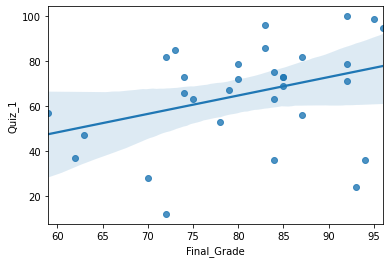

In [20]:
df = pd.read_csv("students.csv")

#Getting rid of seemingly uneccesary fields (EX: hair color)
new_df = df[["Avg_Grade","Quiz_1","Quiz_2","Midterm",   "Final_Grade","Hair_Color","Glasses","Gender"]]

# use the function regplot to make a scatterplot
sns.regplot(x=new_df["Final_Grade"], y=new_df["Quiz_1"])



AttributeError: module 'seaborn' has no attribute 'plt'

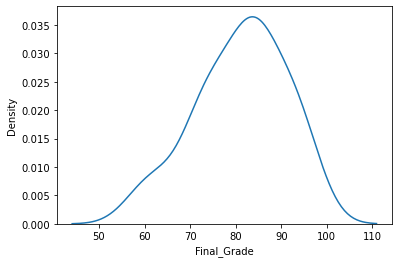

In [19]:
#Density plot for Avg_Grade
sns.kdeplot(new_df['Avg_Grade'])
sns.plt.show()

#Density plot for Final Grade
sns.kdeplot(new_df['Final_Grade'])
sns.plt.show()

In [23]:
#OLS

y = new_df[["Final_Grade"]]
x = new_df[["Avg_Grade", "Midterm"]]
OLS = sm.OLS(y, x).fit()
print(OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:            Final_Grade   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1321.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                    3.30e-29
Time:                        22:46:59   Log-Likelihood:                         -110.34
No. Observations:                  31   AIC:                                      224.7
Df Residuals:                      29   BIC:                                      227.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#So it seems that much of the variance in the data of Final_Grade can be explained because R-squared is .988 which is very good. 
#This can probably be attribute to the fact that Avg_grade and midterms have an impact on the final grade, even if we don't necessarily know other grades from the student, 
#like participation, homeworkds, etc.